# Classifying Objects
Triangles - Tetragons - Pentagons

In [1]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf
from keras import backend as K

from keras import regularizers

from __future__ import print_function
from __future__ import division
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt

#from keras import metrics
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
#from keras.callbacks import TensorBoard

/Users/yonar/anaconda2/envs/tensorflowenv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras import optimizers
from keras.utils import to_categorical
from keras import callbacks
from copy import deepcopy

In [6]:
%matplotlib notebook
#%matplotlib inline

In [ ]:
# Save workspace
filename = 'NNforClassificationWorkspace1'
dill.dump_session(filename)

In [ ]:
A = np.loadtxt(open("filename", 'rb'), delimiter=",", skiprows=0)
np.savetxt("filename",VarName)

In [363]:
import pickle
# Saving the objects:
with open('ensemble_models.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([Ensemble_Weights_List_Original, w], f)

In [6]:
import pickle
# Getting back the objects:
with open('ensemble_models.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    Ensemble_Weights_List_Original, w = pickle.load(f)

#### Import data and pre-process

In [8]:
#load dataset
import dill
filename = 'PolygonImagesV7.pkl'
dill.load_session(filename)

#if you save CompileDataset as function .py file you can do from file.py import func.

In [9]:
# from [0,255] range to [0,1] range
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.
val_x = val_x.astype('float32') / 255.

train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))
val_x = val_x.reshape((len(val_x), np.prod(val_x.shape[1:])))

train_y = to_categorical(train_y, num_classes=3)
test_y = to_categorical(test_y, num_classes=3)
val_y = to_categorical(val_y, num_classes=3)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)


(36000, 2025)
(36000, 3)
(12000, 2025)
(12000, 3)
(12000, 2025)
(12000, 3)


In [10]:
# Standardization of the data - substract mean of each dimention and divede to std of each dimentions
test_x = (test_x - train_x.mean(axis=0)) / (train_x.std(axis=0) + 0.001) / 5
val_x = (val_x - train_x.mean(axis=0)) / (train_x.std(axis=0) + 0.001) / 5
train_x = (train_x - train_x.mean(axis=0)) / (train_x.std(axis=0) + 0.001) / 5 #have to this last

In [11]:
train_x_copy = deepcopy(train_x)
train_y_copy = deepcopy(train_y)
test_x_copy = deepcopy(test_x)
test_y_copy = deepcopy(test_x)
val_x_copy = deepcopy(val_x)
val_y_copy = deepcopy(val_x)

In [12]:
#Shuffle train data once
from sklearn.utils import shuffle
train_x_shuffled, train_y_shuffled = shuffle(train_x, train_y, random_state=None)

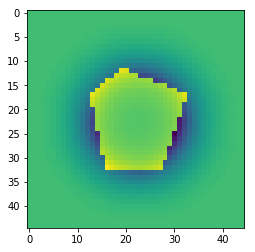

In [13]:
plt.imshow(train_x_shuffled[10101].reshape(45,45))
plt.show()

In [14]:
train_y_shuffled[10101]

array([0., 0., 1.])

#### ConvNet model

In [47]:
num_classes = 3

In [97]:
train_x = train_x.reshape(train_x.shape[0], 60, 60, 1)
test_x = test_x.reshape(test_x.shape[0], 60, 60, 1)
val_x = val_x.reshape(val_x.shape[0], 60, 60, 1)
input_shape = (60, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import time
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(60,60,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_x, train_y, 
                       batch_size=128, epochs=100, 
                       validation_data = (val_x, val_y), 
                       verbose=1)
end = time.time()


In [ ]:
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

#### Build Model

In [15]:
input_img = Input(shape=(2025,))
x = Dense(100, activation='relu')(input_img)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
output_class = Dense(3, activation='softmax')(x)

NNetwork = Model(input_img, output_class)

In [16]:
NNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2025)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               202600    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 223,103
Trainable params: 223,103
Non-trainable params: 0
_________________________________________________________________


In [17]:
# you can get initializaed weights before training.
initw = NNetwork.get_weights()

In [18]:
initw[0].shape

(2025, 100)

In [19]:
#mysgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=1e-4, nesterov=False)
#opt = optimizers.Adam(lr=0.001)
NNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
NNetwork.fit(train_x, train_y,
                epochs=40,
                batch_size=128,
                shuffle=True,
                validation_data=(val_x, val_y))

Train on 36000 samples, validate on 12000 samples
Epoch 1/40
36000/36000 [==============================] - 2s 49us/step - loss: 0.1946 - acc: 0.9202 - val_loss: 0.0692 - val_acc: 0.9750
Epoch 2/40
36000/36000 [==============================] - 1s 42us/step - loss: 0.0268 - acc: 0.9919 - val_loss: 0.0158 - val_acc: 0.9953
Epoch 3/40
36000/36000 [==============================] - 2s 43us/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0354 - val_acc: 0.9892
Epoch 4/40
36000/36000 [==============================] - 2s 46us/step - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0190 - val_acc: 0.9938
Epoch 5/40
36000/36000 [==============================] - 2s 46us/step - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0089 - val_acc: 0.9972
Epoch 6/40
36000/36000 [==============================] - 2s 45us/step - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0168 - val_acc: 0.9942
Epoch 7/40
36000/36000 [==============================] - 2s 47us/step - loss: 0.0080 - acc: 0.9971 - val_loss: 0.0146 - val_acc

In [ ]:
y_pred = NNetwork.predict(test_x)

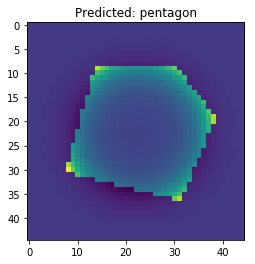

In [62]:
plt.imshow(test_x[8000].reshape(45,45))
mylabels = ['triangle','tetragon','pentagon']
ind = np.where(y_pred[8000]==1.)[0][0]
plt.title('Predicted: '+ mylabels[ind])
plt.show()

In [25]:
# Tensorboard
tensorboard = callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
#from time import time
#tensorboard = callbacks.TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=0,
#                          write_graph=True, write_images=False)


In [26]:
# run with tensorboard
NNetwork.fit(train_x, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(val_x, val_y),
          shuffle=True,
          callbacks=[tensorboard])

Train on 36000 samples, validate on 12000 samples
Epoch 1/10
36000/36000 [==============================] - 2s 51us/step - loss: 2.2954e-06 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 0.9982
Epoch 2/10
36000/36000 [==============================] - 2s 52us/step - loss: 2.2672e-06 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 0.9982
Epoch 3/10
36000/36000 [==============================] - 2s 54us/step - loss: 2.2394e-06 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9982
Epoch 4/10
36000/36000 [==============================] - 2s 54us/step - loss: 2.2113e-06 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 0.9982
Epoch 5/10
36000/36000 [==============================] - 2s 51us/step - loss: 2.1846e-06 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9982
Epoch 6/10
36000/36000 [==============================] - 2s 48us/step - loss: 2.1584e-06 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9982
Epoch 7/10
36000/36000 [==============================] - 2s 49us/step - loss: 2.1323e-06 - acc: 1.0000 

In [266]:
# Branching From Original Network
OriginalNetwork = NNetwork
OriginalNetwork.save('OriginalNetwork3.h5')

In [270]:
from keras.models import load_model
NNetwork = load_model('OriginalNetwork3.h5')

In [64]:
w = NNetwork.get_weights() # original weights

In [70]:
w[1].shape

(100,)

In [272]:
# generate small subset of batch for short training
def make_mybatch(x,y,bs=128):
    from sklearn.utils import shuffle
    x, y = shuffle(x, y, random_state=None)
    x = x[:bs]
    y = y[:bs]
    return x, y


In [273]:
tempbatch_x, tempbatch_y = make_mybatch(train_x_copy, train_y_copy, 1)
print(tempbatch_x.shape)
print(tempbatch_y.shape)

(1, 2025)
(1, 3)


In [340]:
bs=32
spoint = np.random.randint(0,len(train_x_shuffled)-bs-2)
spoint

19634

# Ensemble of Models


In [341]:
# Ensemble of Models - single load version

from keras.models import load_model
NNetwork = load_model('OriginalNetwork3.h5')
mysgd = optimizers.SGD(lr=3, momentum=0.0, decay=0.0, nesterov=False)
#opt = optimizers.Adam(lr=0.001)
NNetwork.compile(optimizer=mysgd, loss='categorical_crossentropy', metrics=['accuracy'])

N=100 #number of models
Ensemble_Weights_List=[]
for i in range(N):
    bs=32
    spoint = np.random.randint(0,len(train_x_shuffled)-bs-2)
    
    NNetwork.fit(train_x_shuffled[spoint:spoint+bs], train_y_shuffled[spoint:spoint+bs],
                epochs=1,
                batch_size=bs,
                shuffle=False,
                validation_data=(val_x, val_y))
    
    [loss, acc] = NNetwork.evaluate(test_x,test_y, verbose=0)
    print(i+1)
    print(acc)
    
    tempw = NNetwork.get_weights()
    Ensemble_Weights_List.append(tempw)

Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 12s 361ms/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
1
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 4s 134ms/step - loss: 4.9174e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
2
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 4s 131ms/step - loss: 1.5274e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
3
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 4s 128ms/step - loss: 8.9967e-07 - acc: 1.0000 - val_loss: 0.0164 - val_acc: 0.9974
4
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 4s 126ms/step - loss: 3.9844e-06 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 0.9973
5
0.996333333333
Trai

KeyboardInterrupt: 

In [303]:
# Ensemble of Models

from keras.models import load_model
N=100 #number of models
Ensemble_Weights_List=[]
for i in range(N):
    
    NNetwork = load_model('OriginalNetwork3.h5')
    
    mysgd = optimizers.SGD(lr=3, momentum=0.0, decay=0.0, nesterov=False)
    #opt = optimizers.Adam(lr=0.001)
    NNetwork.compile(optimizer=mysgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    tempbatch_x, tempbatch_y = make_mybatch(train_x_copy, train_y_copy, 32)
    
    NNetwork.fit(tempbatch_x, tempbatch_y,
                epochs=1,
                batch_size=32,
                shuffle=False,
                validation_data=(val_x, val_y))
    
    [loss, acc] = NNetwork.evaluate(test_x,test_y, verbose=0)
    print(i+1)
    print(acc)
    
    tempw = NNetwork.get_weights()
    Ensemble_Weights_List.append(tempw)
    
    
    

Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 9s 270ms/step - loss: 1.3784e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
1
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 8s 263ms/step - loss: 0.5037 - acc: 0.9688 - val_loss: 0.0164 - val_acc: 0.9974
2
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 8s 257ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
3
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 9s 269ms/step - loss: 6.4214e-05 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 0.9973
4
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 9s 268ms/step - loss: 7.1153e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
5
0.996333333333
Train on 

Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 11s 331ms/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
42
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 11s 328ms/step - loss: 2.7567e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
43
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 11s 335ms/step - loss: 1.3411e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
44
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 11s 351ms/step - loss: 1.4156e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
45
0.996333333333
Train on 32 samples, validate on 12000 samples
Epoch 1/1
32/32 [==============================] - 11s 352ms/step - loss: 1.3784e-07 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 0.9973
46
0.99633333

KeyboardInterrupt: 

In [278]:
Ensemble_Weights_List_Original = deepcopy(Ensemble_Weights_List)

In [30]:
Ensemble_Weights_List = deepcopy(Ensemble_Weights_List_Original)

In [279]:
N=len(Ensemble_Weights_List)
N

100

In [281]:
# Make every network weigths a single vector - ALTERNATIVE
EM = np.empty([N, 4031003])
for i in range(N):
    
    t = deepcopy(Ensemble_Weights_List[i])
    t_flat = [x.flatten() for x in t]
    EM[i] = np.concatenate(t_flat)

In [282]:
# Visualize Model Weights with t-SNE - Make dim reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
EM_embedded = PCA(n_components=2).fit_transform(EM)
#EM_embedded = PCA(n_components=2).fit_transform(X2)

<IPython.core.display.Javascript object>


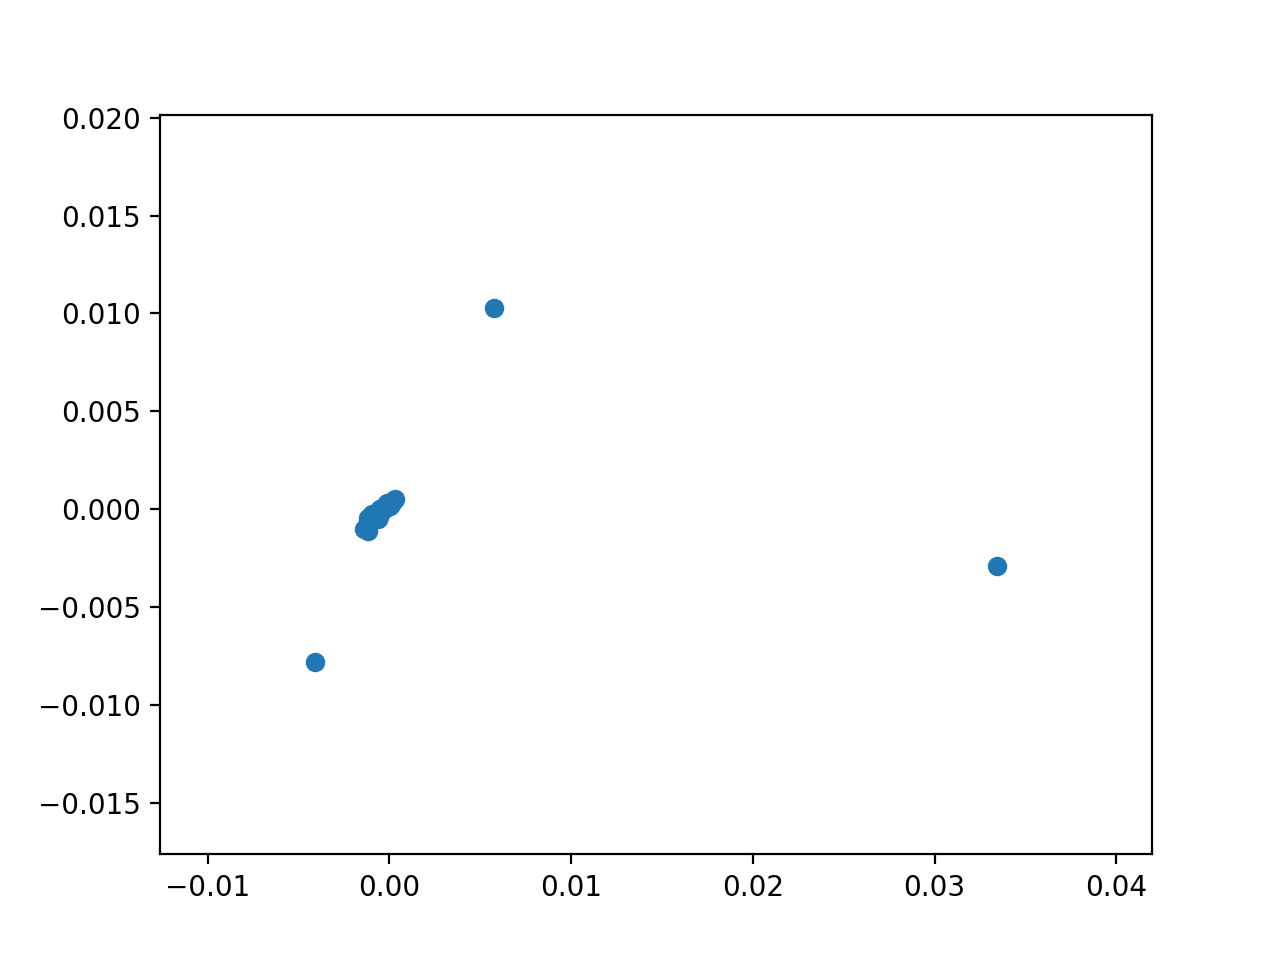

In [283]:
# Visualize Model Weights with t-SNE - Plot
plt.scatter(EM_embedded[:,0],EM_embedded[:,1])
plt.show()

In [284]:
EMT = EM.transpose()

In [295]:
X2 = deepcopy(X[-3003:])
X2.shape

(3003, 100)

In [296]:
CovMat = np.cov(X2)
CovMat.shape

(3003, 3003)

In [297]:
eigval, eigvec = np.linalg.eig(CovMat)

In [302]:
eigval

array([  8.59470411e-07+0.j,   2.07940363e-08+0.j,   2.45818189e-09+0.j,
       ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
         0.00000000e+00+0.j])

<IPython.core.display.Javascript object>


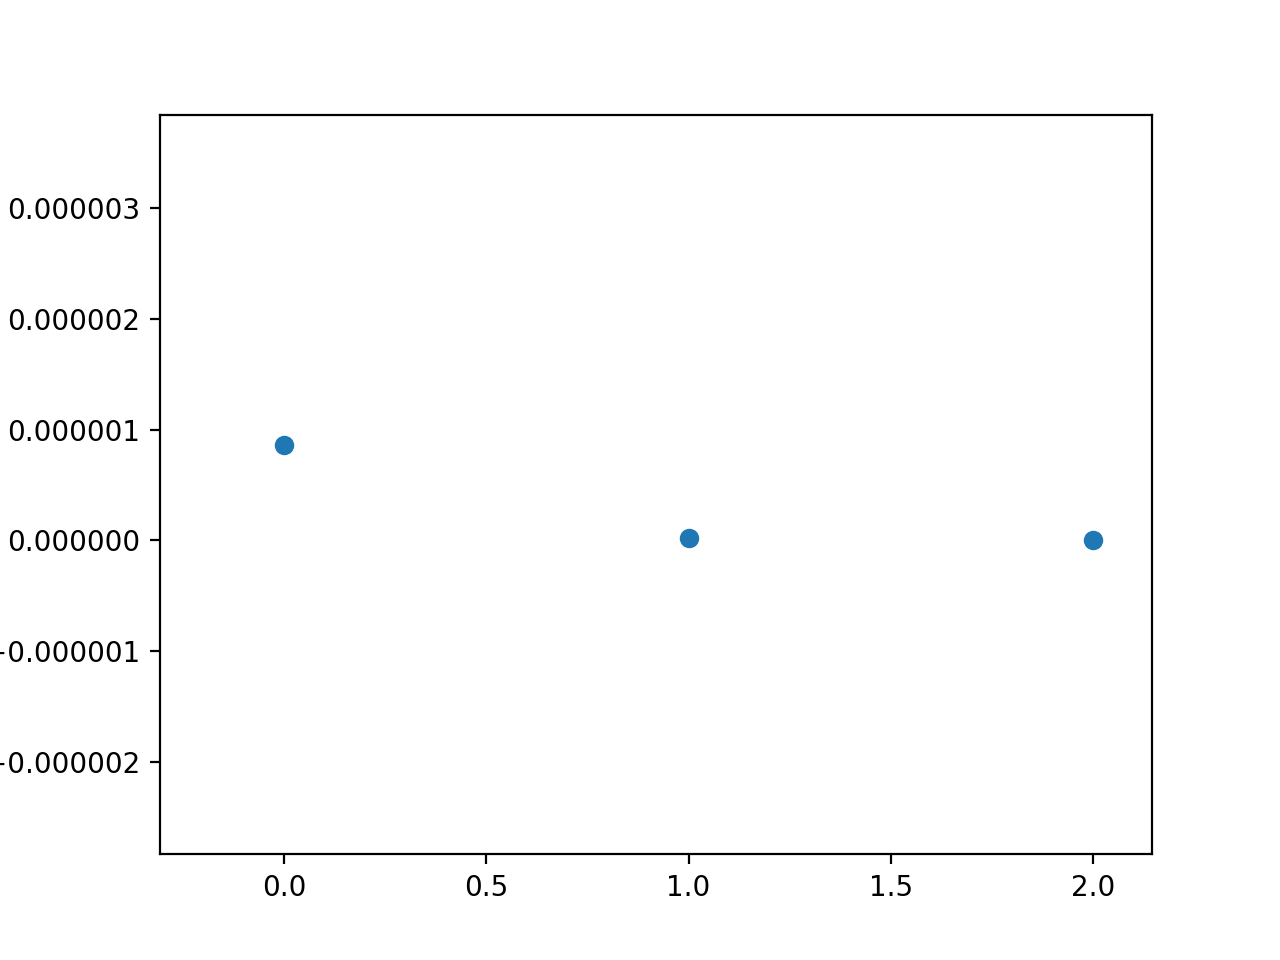

/Users/yonar/anaconda2/envs/tensorflowenv/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [301]:
plt.scatter(range(len(eigval)),eigval)
plt.show()

In [176]:
np.count_nonzero(CovMat==0)

315289

### Check weights

In [ ]:
X = np.load('EMT_weights_flat_0mean.npy', mmap_mode='r')

In [287]:
Xstd = X.std(axis=1, keepdims=True)

In [288]:
Xstdcopy = deepcopy(Xstd)

In [125]:
temp = Xstdcopy[startpoints[i]:startpoints[i]+a]
temp.shape

(213003, 1)

4100625

In [129]:
# map this back to network structure - use original w weights list

startpoints = [0] * len(w)
for i in range(len(w)):
    for j in range(i):
        if len(w[j].shape)==2:
            startpoints[i] += w[j].shape[0]*w[j].shape[1]
        else:
            startpoints[i] += w[j].shape[0]
        
XstdList=[];
for i in range(len(w)):
    if len(w[i].shape)==2:
        temp = Xstdcopy[startpoints[i]:startpoints[i]+w[i].shape[0] * w[i].shape[1]]
        XstdList.append(np.reshape(temp, (w[i].shape[0], w[i].shape[1])))
    else:
        temp = Xstdcopy[startpoints[i]:startpoints[i]+w[i].shape[0]]
        XstdList.append(np.reshape(temp, (w[i].shape[0],)))


<IPython.core.display.Javascript object>


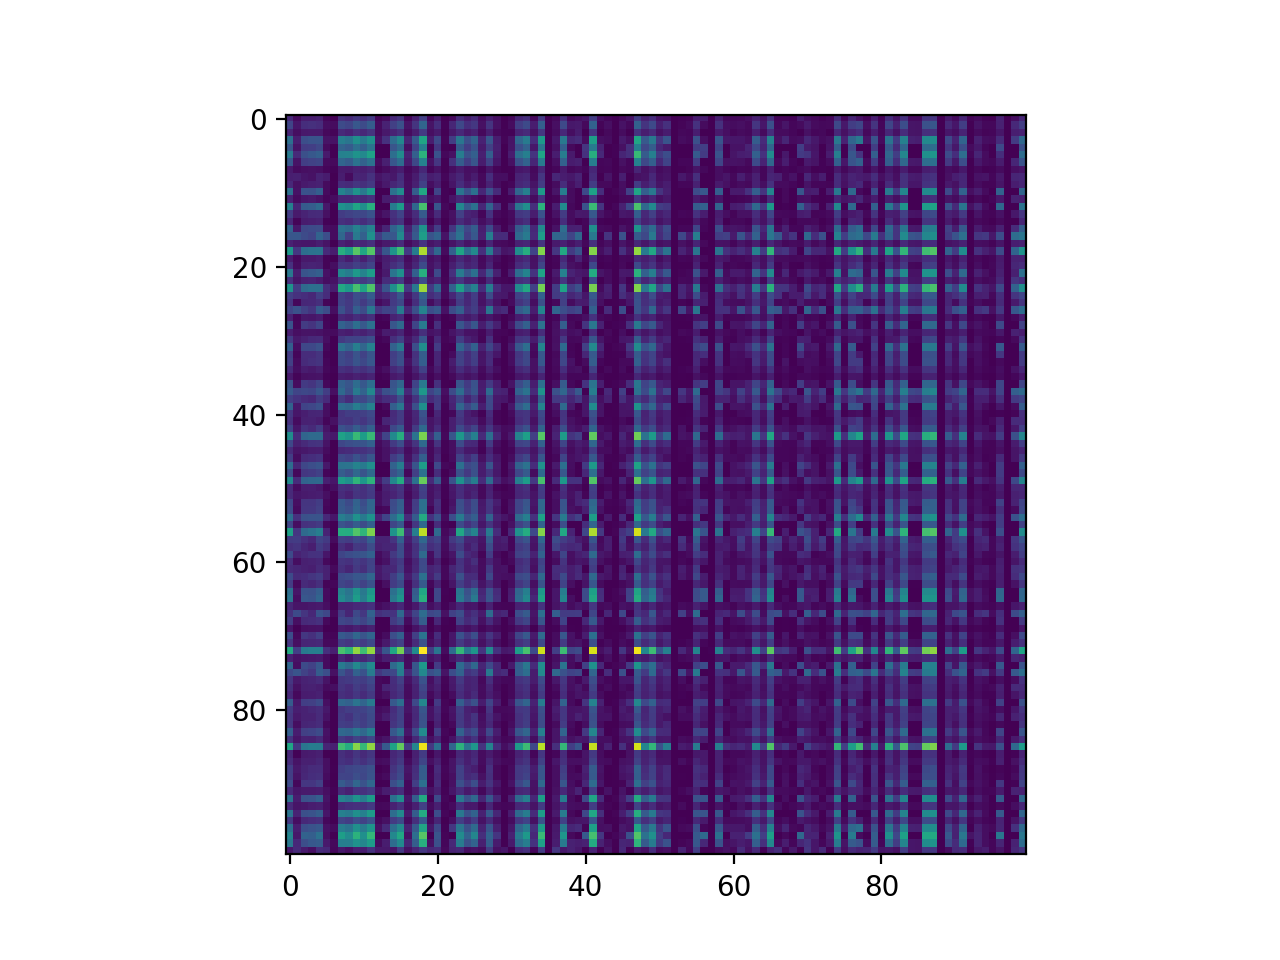

In [151]:
plt.imshow(XstdList[2])
plt.show()

<IPython.core.display.Javascript object>


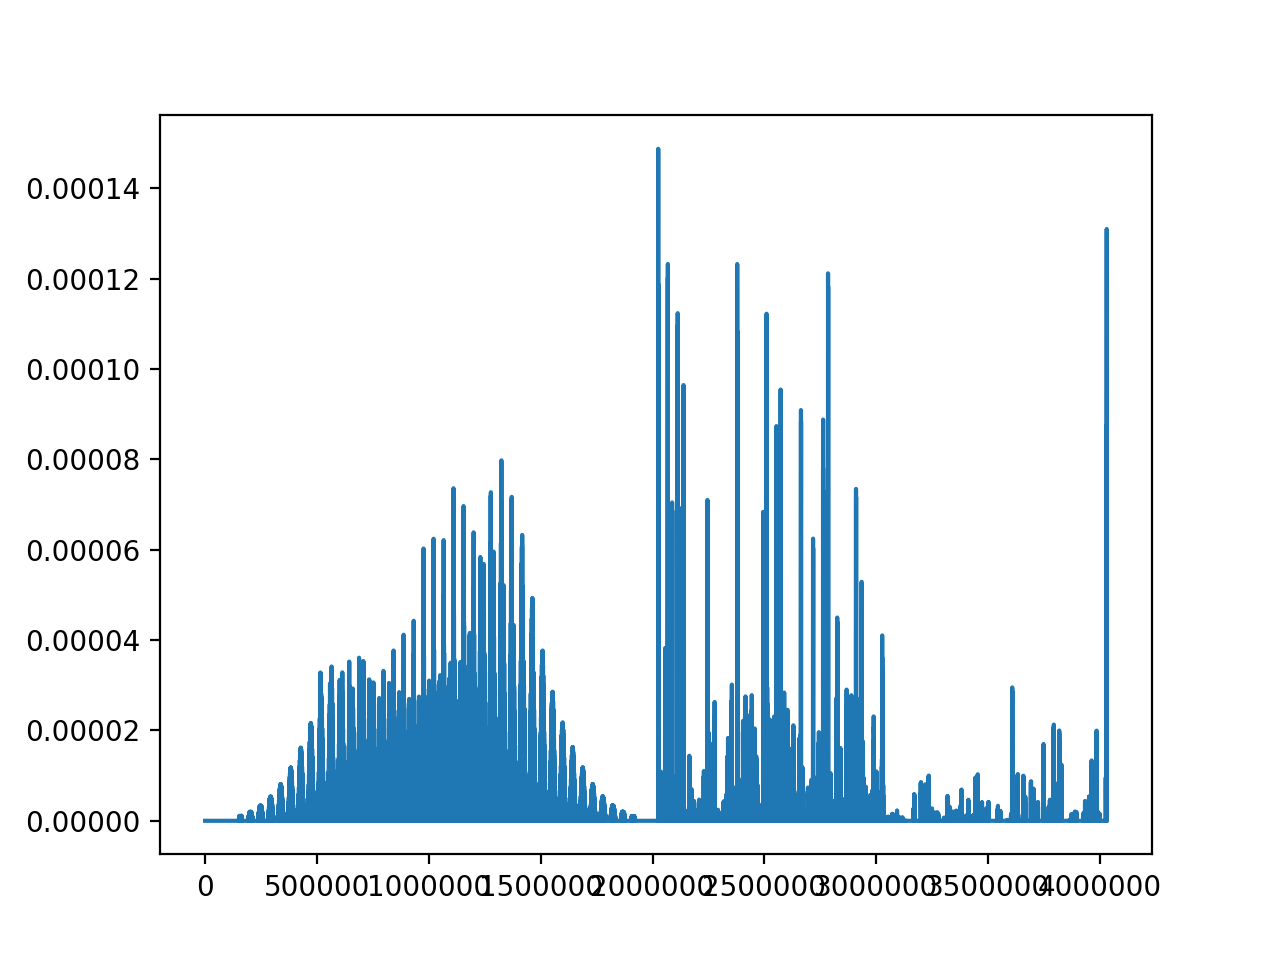

In [294]:
plt.plot(Xstd)
plt.show()

### Calculate Covariance Matrix

In [285]:
# data i/o
import os

# compute in parallel
from multiprocessing import Pool

# the usual
import numpy as np
import pandas as pd

import deepgraph as dg

In [286]:
# create observations
n_samples = EMT.shape[0]
n_features = EMT.shape[1]
#np.save('EMT_weights_flat', EMT)
X = deepcopy(EMT)
Xvar = X.var(axis=1, keepdims=True, ddof=1)
# whiten variables for fast parallel computation later on
X = X - X.mean(axis=1, keepdims=True)
#X = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)

# save in binary format
#np.save('EMT_weights_flat_0mean', X)

In [ ]:
# parameters (change these to control RAM usage)
step_size = 1e5
n_processes = 100000

# load samples as memory-map
X = np.load('EMT_weights_flat_0mean.npy', mmap_mode='r')

# create node table that stores references to the mem-mapped samples
v = pd.DataFrame({'index': range(X.shape[0])})

# connector function to compute pairwise pearson correlations
def corr(index_s, index_t):
    samples_s = X[index_s]
    samples_t = X[index_t]
    corr = np.einsum('ij,ij->i', samples_s, samples_t) / (n_features-1)
    return corr

# index array for parallelization
pos_array = np.array(np.linspace(0, n_samples*(n_samples-1)//2, n_processes), dtype=int)

# parallel computation
def create_ei(i):

    from_pos = pos_array[i]
    to_pos = pos_array[i+1]

    # initiate DeepGraph
    g = dg.DeepGraph(v)

    # create edges
    g.create_edges(connectors=corr, step_size=step_size, 
                   from_pos=from_pos, to_pos=to_pos)

    # store edge table
    g.e.to_pickle('/tmp/corr/{}.pickle'.format(str(i).zfill(3)))
    
    if i % 100000 == 0:
        print(i)
    
# computation
if __name__ == '__main__':
    indices = np.arange(0, n_processes - 1)
    p = Pool()
    for _ in p.imap_unordered(create_ei, indices):
        pass

0


In [ ]:
# store correlation values
files = os.listdir('/tmp/corr/')
files.sort()
store = pd.HDFStore('e.h5', mode='w')
for f in files:
    et = pd.read_pickle('/tmp/corr/{}'.format(f))
    store.append('e', et, format='t', data_columns=True, index=False)
store.close()

In [ ]:
# load correlation table
e = pd.read_hdf('e.h5')
print(e)

### Playing

In [33]:
from keras.models import load_model
NNetwork = load_model('OriginalNetwork1.h5')

In [258]:
NNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2025)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              2026000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3003      
Total params: 4,031,003
Trainable params: 4,031,003
Non-trainable params: 0
_________________________________________________________________


In [259]:
w = NNetwork.get_weights()

In [262]:
[loss, acc] = NNetwork.evaluate(test_x,test_y, verbose=1)
acc


12000/12000 [==============================] - 2s 182us/step


0.99633333333333329

In [263]:
y_pred = NNetwork.predict(test_x)

In [264]:
a = y_pred.argmax(axis=1)
b = test_y.argmax(axis=1)

<IPython.core.display.Javascript object>


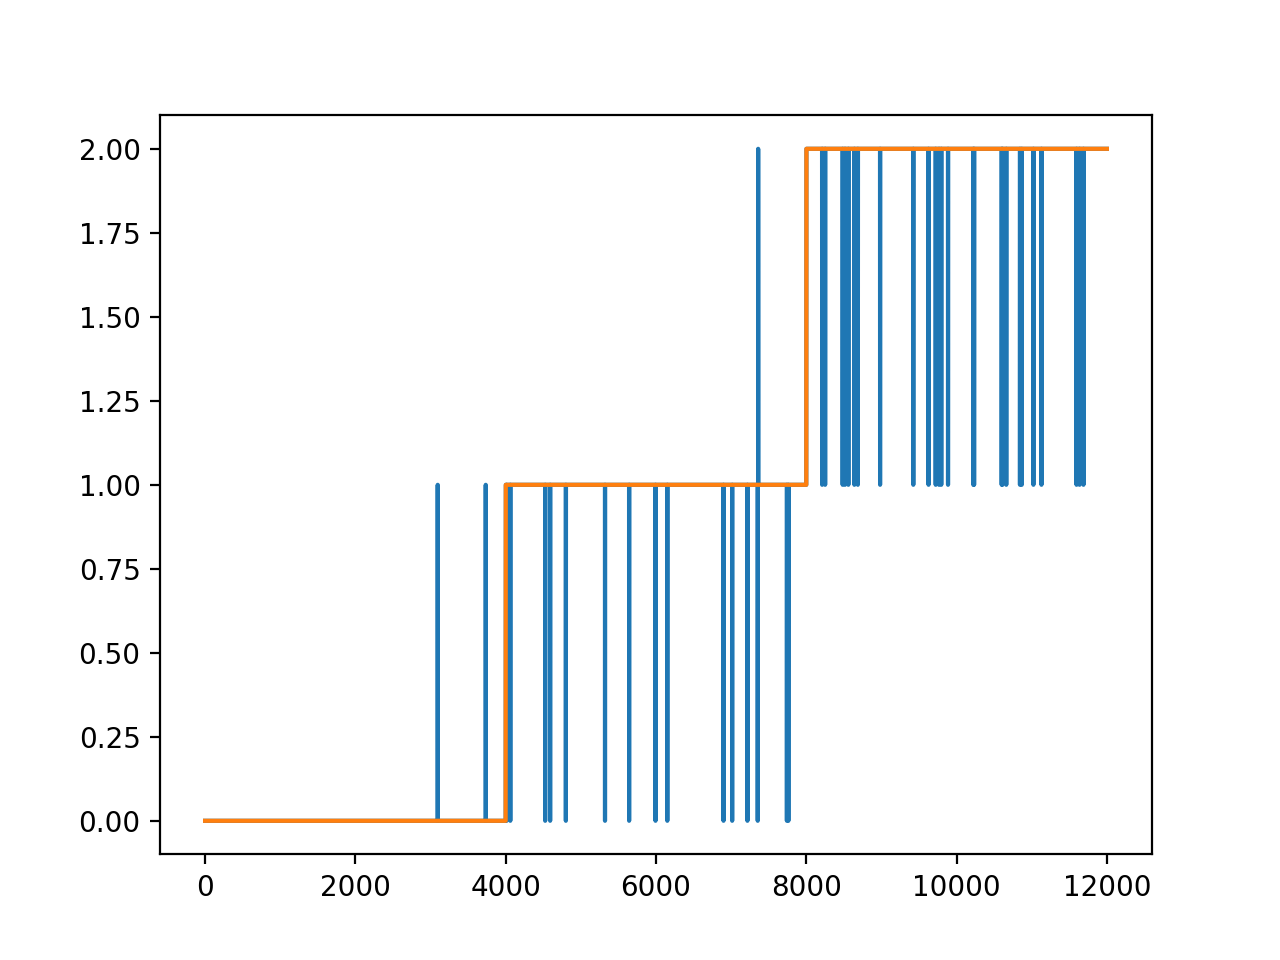

In [265]:
plt.plot(a)
plt.plot(b)

plt.show()

<IPython.core.display.Javascript object>


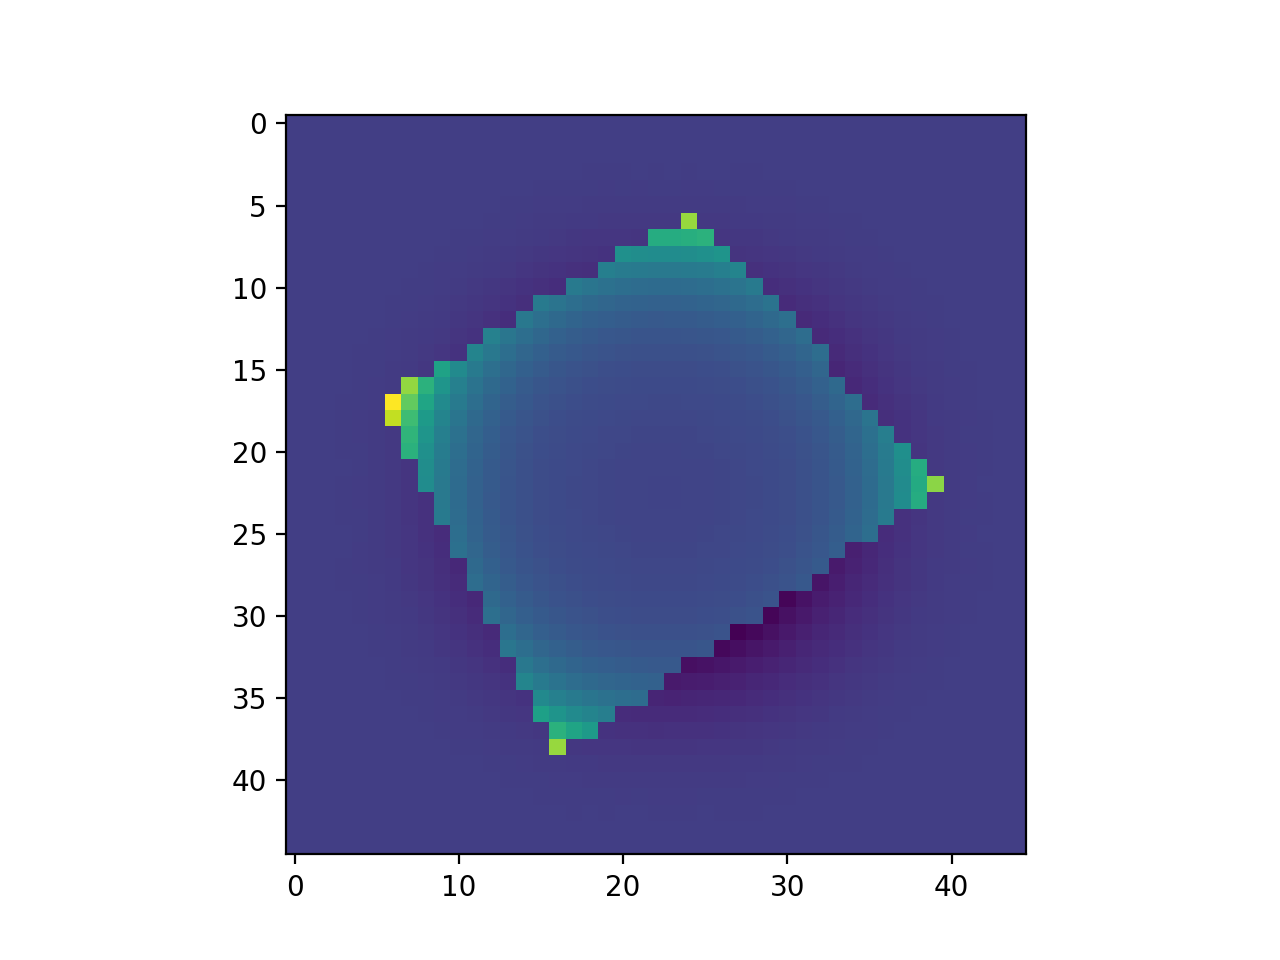

In [326]:
plt.imshow(train_x_shuffled[12144].reshape(45,45))
plt.show()

In [327]:
train_y_shuffled[12144]

array([ 0.,  1.,  0.])

In [189]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [27]:
NN2 = NNetwork

In [43]:
w2 = NN2.get_weights()

In [45]:
w[5]

array([-1.98887491,  0.87693405,  0.51459616], dtype=float32)

In [46]:
w2[5]

array([-1.98887491,  0.87693405,  0.51459616], dtype=float32)

In [44]:
## Go into gut of the model
w = NNetwork.get_weights()

In [26]:
NNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2025)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               202600    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
Total params: 213,003
Trainable params: 213,003
Non-trainable params: 0
_________________________________________________________________


In [56]:
NNetwork.save('NNetwork180219_v2.h5')

In [36]:
## use model save
#model.save()
from keras.models import load_model
NNetwork = load_model('mymodel2.h5')

<IPython.core.display.Javascript object>


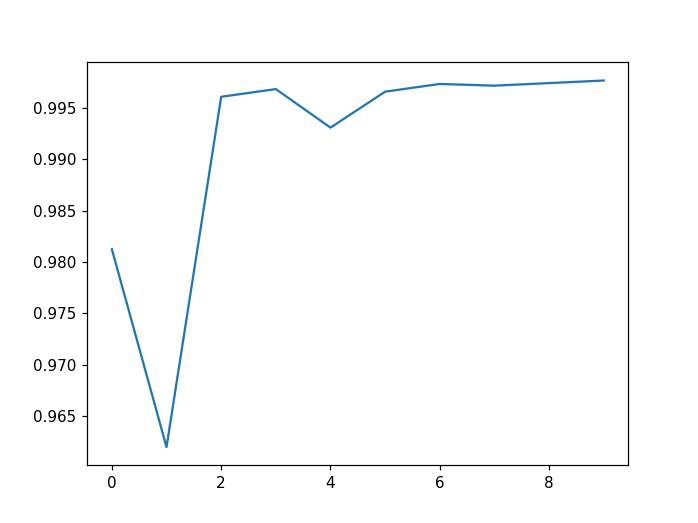

In [75]:
plt.plot(NNetwork.history.history['val_acc'])
plt.show()

#### Visualize Activations

In [83]:
# Get Activations
# if you want to get activation of a single image instead of batch of images, you need to reshape it.
# here is the explanation (https://stackoverflow.com/questions/40430186/tensorflow-valueerror-cannot-feed-value-of-shape-64-64-3-for-tensor-uplace)

#test_x_for_act = test_x.reshape(1,len(test_x))

firing = get_activations(NNetwork, 3, train_x)
firing = firing[0]

In [89]:
%matplotlib notebook

In [84]:
firing.shape

(36000, 3)

<IPython.core.display.Javascript object>


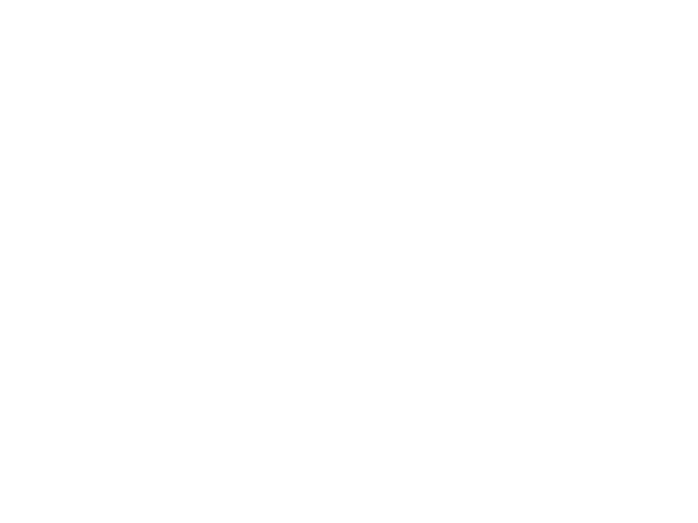

In [90]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(firing[:1000,0], firing[:1000,1], firing[:1000,2], c=test_y, marker='o')

ax.set_xlabel('Neuron 1')
ax.set_ylabel('Neuron 2')
ax.set_zlabel('Neuron 3')

plt.show()

<IPython.core.display.Javascript object>


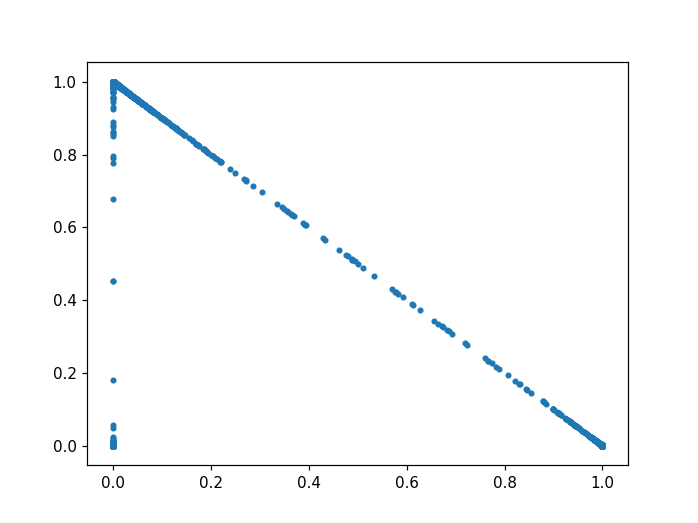

In [27]:
plt.scatter(firing[:,2], firing[:,1], marker='.')
plt.show()

In [28]:
## Finding hard to recognize objects
temp = firing.max(axis=1)
temp2 = temp.argsort()

In [33]:
firing[10000]

array([  1.78864915e-14,   1.98696398e-05,   9.99980092e-01], dtype=float32)

In [4]:
whos

Interactive namespace is empty.


<IPython.core.display.Javascript object>


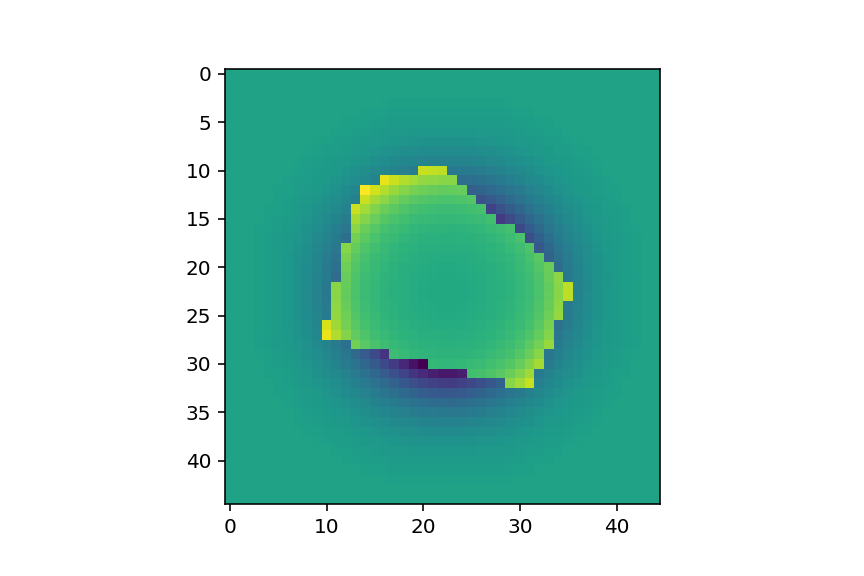

In [15]:
a = test_x[9819].reshape(45,45)
plt.imshow(a)
plt.show()

In [ ]:
from PIL import Image
img = Image.fromarray(train_x[0])
img2 = img.resize((28,28), Image.ANTIALIAS)
img3 = np.array(img2)

import matplotlib.pyplot as plt
plt.imshow(img3)
plt.show()
plt.imshow(train_x[0])
plt.show()

### Extra Functions 

In [13]:
def get_activations(model, layer, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()], [model.layers[layer].output])
    activations = get_activations([X_batch,0])
    return activations

In [ ]:
# Get Learning Rate from each epoch. if you use LearningRateScheduler or ReduceLROnPlateau,
# the learning rate is directly updated by the callback, and the printed value will change after each epoch.

def on_epoch_end(self, epoch, logs=None):
    print(K.eval(self.model.optimizer.lr))
    
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        decay = self.model.optimizer.decay
        iterations = self.model.optimizer.iterations
        lr_with_decay = lr / (1. + decay * K.cast(iterations, K.dtype(decay)))
        print(K.eval(lr_with_decay))